## 数据收集

### 推特图像预测数据

In [1]:
import requests
import os
import pandas as pd
import numpy as np

In [2]:
#该代码只允许一次
folder_name = 'wrangle_act' #在本地已建好文件夹
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,
                      url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

### 导入数据
1. WeRateDogs的推特数据

In [2]:
twitter_archive_enhanced = pd.read_csv("wrangle_act/twitter-archive-enhanced.csv")

In [13]:
twitter_archive_enhanced.text.sample(5)

310     RT @dog_rates: So this just changed my life. 1...
843     His name is Charley and he already has a new s...
1688    This is Carly. She's actually 2 dogs fused tog...
2288    These are strange dogs. All have toupees. Long...
1966    IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...
Name: text, dtype: object

2. 导入推特图像的预测数据

In [3]:
image_predictions = pd.read_csv('wrangle_act/image-predictions.tsv',sep='\t')

3. 每条推特的额外附加数据_收集tweet ID,retweet_count 和favorite_count

In [4]:
import json

In [5]:
with open('wrangle_act/tweet_json.txt','r') as json_file:
    tweet_json = json_file.readlines()

In [6]:
tweet_extra={'tweet_ID':[],'retweet_count':[],'favorite_count':[]}
for tj in tweet_json:
    tjj = json.loads(tj)
    tweet_extra['tweet_ID'].append(tjj['id_str'])
    tweet_extra['retweet_count'].append(tjj['retweet_count'])
    tweet_extra['favorite_count'].append(tjj['favorite_count'])
    
tweet_extra=pd.DataFrame(tweet_extra)

## 数据评估

In [7]:
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1806,676936541936185344,NaN,NaN,2015-12-16 01:27:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a rare pouched pupper. Ample stora...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
1170,720775346191278080,NaN,NaN,2016-04-15 00:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Berkeley. He's in a predicament. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720775346...,10,10,Berkeley,None,None,None,None
735,781163403222056960,NaN,NaN,2016-09-28 16:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","We normally don't rate lobsters, but this one ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/781163403...,10,10,None,None,None,None,None
2189,668967877119254528,6.689207e+17,21435658.0,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [8]:
#查看数据基本信息
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive_enhanced[['doggo','floofer','pupper','puppo']].sample(5)

,doggo,floofer,pupper,puppo
1211,None,None,None,None
1038,None,None,None,None
1861,None,None,None,None
2086,None,None,None,None
477,None,None,None,None


In [10]:
#分数问题-分子与分母问题
twitter_archive_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

比较异常的分子：1776

In [11]:
twitter_archive_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

比较异常的分母：2，16，15，7，0

In [12]:
#分子=1776时
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator==960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [13]:
twitter_archive_enhanced.iloc[979][9]

'https://twitter.com/dog_rates/status/749981277374128128/photo/1'

In [14]:
#分母 = 2,16,15,7,0
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator==2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [15]:
twitter_archive_enhanced.iloc[342][5]

'@docmisterio account started on 11/15/15'

In [16]:
twitter_archive_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
twitter_archive_enhanced.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Tucker           10
Penny            10
Lola             10
Winston           9
Bo                9
Sadie             8
the               8
Buddy             7
Daisy             7
an                7
Bailey            7
Toby              7
Oscar             6
Dave              6
Bella             6
Jax               6
Leo               6
Koda              6
Milo              6
Stanley           6
Jack              6
Rusty             6
Scout             6
Oakley            5
               ... 
Liam              1
Frönq             1
Sora              1
Fynn              1
Ronnie            1
DayZ              1
Terrenth          1
Ike               1
Dook              1
Odin              1
Pubert            1
Marty             1
Smiley            1
Sephie            1
Socks             1
Willie            1
Rooney            1
Maxwell           1
Chuck             1


In [18]:
#查看name列有多少小写开头的单词
name = twitter_archive_enhanced['name']
error_name = []
for i in name:
    if ord('a')<=ord(i[0])<= ord('z'):
        error_name.append(i)
        
error_name = list(set(error_name))
error_name.append('None') #将None也添加至error_name中，方便后面进行统一替换
error_name

['the',
 'life',
 'not',
 'by',
 'his',
 'very',
 'old',
 'space',
 'an',
 'one',
 'my',
 'this',
 'unacceptable',
 'just',
 'infuriating',
 'quite',
 'actually',
 'all',
 'getting',
 'mad',
 'such',
 'light',
 'officially',
 'a',
 'incredibly',
 'None']

In [19]:
twitter_archive_enhanced['expanded_urls'].sample(5)

1800    https://twitter.com/dog_rates/status/676975532...
333     https://twitter.com/dog_rates/status/832757312...
2071    https://twitter.com/dog_rates/status/671115716...
1743                        https://vine.co/v/iKVFEigMLxP
1233    https://twitter.com/dog_rates/status/712809025...
Name: expanded_urls, dtype: object

In [20]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
384,673343217010679808,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,1,Chihuahua,0.541408,True,Italian_greyhound,0.156891,True,miniature_pinscher,0.069556,True
966,706291001778950144,https://pbs.twimg.com/media/Cc0_2tXXEAA2iTY.jpg,1,Border_terrier,0.587101,True,bull_mastiff,0.164087,True,Staffordshire_bullterrier,0.105011,True
568,678380236862578688,https://pbs.twimg.com/media/CWoXOfSUAAA4u8g.jpg,1,dogsled,0.088540,False,snowmobile,0.057291,False,Samoyed,0.047601,True
823,693155686491000832,https://pbs.twimg.com/media/CZ6VatdWwAAwHly.jpg,3,Shih-Tzu,0.697480,True,Lhasa,0.200151,True,Tibetan_terrier,0.090970,True
595,679511351870550016,https://pbs.twimg.com/media/CW4b-GUWYAAa8QO.jpg,1,Chihuahua,0.761972,True,black-footed_ferret,0.150605,False,squirrel_monkey,0.028148,False


In [21]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
tweet_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
tweet_ID          2352 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### 整洁度问题
###### `twitter_archive_enhanced表`
1. 存在转发评级，其中retweeted_status_id 不为空的的数据为转发评级，需要删除
2. 没有图片的评分的数据需要删除，将image_predictions 合并到twitter_archive_copy后，删除jpg_url为空的数据
3. tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id 不应该是int64类型，而应该是string类型; timestamp应该是日期类型
4. twitter_ID为835246439529840640的评分不应该是960/0，而应该是13/10； twitter_ID为666287406224695296的评分不是1/2，而是9/10
5. 分数分母rating_denominator 为16，15，7都不符合规范，需要去掉
6. Name为'a','an','the','this','all','very'等小写字母开头的单词都不是真实的名字，需要改为Nan;同时name为‘None’的值也需要替换为Nan
7. source 应该只用保留中间内容
8. twitter_ID为810984652412424192的 expanded_urls有由逗号隔开的两个链接，其实只需要后面的链接即可
9. tweet_extra_copy 中的favorite_count与retweet_count合并至twitter_archive_enhanced后数据类型变为了float类型，应该转换为int类型
##### `image_predictions表`
9. tweet_id应该是object类型,img_num应该是object类型。
10. p1,p2,p3,p4狗狗类别的大小写不一致，应该全部改为大写

#### 质量问题
`twitter_archive_enhanced表`
1. doggo,floofer,pupper,puppo 应该合并为一个变量
2. twitter_extra的转发数和喜欢数表格合并到twitter_archive_enhanced中

## 数据整理

In [7]:
twitter_archive_copy = twitter_archive_enhanced.copy()
tweet_extra_copy = tweet_extra.copy()
image_predictions_copy = image_predictions.copy()

In [8]:
import re
stages = ['doggo','floor','pupper','puppo']
def stt(line):
    val = ','.join(list(set(re.findall(r'(doggo+|floor+|pupper+|puppo+)',line))))
    if val !='':
        return val
    return np.nan
twitter_archive_copy['stage']=twitter_archive_copy['text'].map(stt)

In [9]:
twitter_archive_copy['stage']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9        doggo
10         NaN
11         NaN
12       puppo
13         NaN
14       puppo
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29      pupper
         ...  
2326       NaN
2327       NaN
2328       NaN
2329       NaN
2330       NaN
2331       NaN
2332       NaN
2333       NaN
2334       NaN
2335     floor
2336       NaN
2337       NaN
2338       NaN
2339       NaN
2340       NaN
2341       NaN
2342       NaN
2343       NaN
2344       NaN
2345       NaN
2346       NaN
2347       NaN
2348       NaN
2349       NaN
2350       NaN
2351       NaN
2352       NaN
2353       NaN
2354       NaN
2355       NaN
Name: stage, Length: 2356, dtype: object

In [26]:
twitter_archive_copy['stage'].value_counts()

pupper          262
doggo            86
puppo            35
doggo,pupper     10
floor             6
puppo,doggo       2
Name: stage, dtype: int64

In [43]:
twitter_archive_copy.iloc[191][17]

['puppo', 'doggo']

In [34]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
stage                         23

In [18]:
m = [1,2,3,4,5,6]
for i in m:
    print(i)

1
2
3
4
5
6


### 整洁度问题
#### 定义
* doggo,floofer,pupper,puppo 应该合并为一个变量
* 使用melt函数,需要考虑这样几个问题（1）有的狗狗的称号不只一个，（2）使用melt函数如何去除重复值
* 可经过以下七步进行操作
#### 代码

** 第一步 ：使用melt函数合并列**

In [53]:
twitter_archive_copy=pd.melt(twitter_archive_copy,id_vars=['tweet_id','in_reply_to_status_id',
                                                           'in_reply_to_user_id','timestamp',
                                                           'source','text','retweeted_status_id','retweeted_status_user_id',
                                                           'retweeted_status_timestamp','expanded_urls','rating_numerator',
                                                           'rating_denominator','name'],value_name='social_status')


In [54]:
twitter_archive_copy.tweet_id.count()

9424

In [55]:
twitter_archive_copy.social_status.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: social_status, dtype: int64

* 问题：出现很多重复列

** 第二步：取出social_status为None的值**

In [56]:
none = twitter_archive_copy[twitter_archive_copy.social_status == 'None']
none.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,variable,social_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None


**第三步：将none数据根据tweet_id去重**

In [57]:
none = none.drop_duplicates(['tweet_id'])
none.social_status.value_counts()

None    2356
Name: social_status, dtype: int64

**第四步：去除twitter_archive_copy中social_status为None的数据**

In [58]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.social_status!='None']
twitter_archive_copy.social_status.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: social_status, dtype: int64

**第五步：将twitter_archive_copy有两个social_status名称的数据进行合并**

In [59]:
twitter_archive_copy[twitter_archive_copy.duplicated(['tweet_id'])] #存在重复数据

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,variable,social_status
2556,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,floofer,floofer
5172,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,pupper,pupper
5243,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,pupper,pupper
5277,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,pupper,pupper
5287,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,pupper,pupper
5417,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,pupper,pupper
5445,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,pupper,pupper
5490,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,pupper,pupper
5534,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,pupper,pupper
5601,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,pupper,pupper


In [60]:
twitter_archive_copy['social_status'] = twitter_archive_copy['social_status']+' '#设置空格分隔符
twitter_archive_copy = twitter_archive_copy.groupby('tweet_id')['social_status'].sum().reset_index() #利用groupby进行合并

In [61]:
twitter_archive_copy.social_status.value_counts()#查看合并情况

pupper            245
doggo              83
puppo              29
doggo pupper       12
floofer             9
doggo puppo         1
doggo floofer       1
Name: social_status, dtype: int64

In [62]:
twitter_archive_copy[twitter_archive_copy.duplicated(['tweet_id'])]#测试，已经合并完成

,tweet_id,social_status


**第六步：将none表与 twitter_archive_copy表进行合并**

In [63]:
twitter_archive_copy = pd.merge(twitter_archive_copy,none,on='tweet_id',how='outer')

In [64]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
social_status_x               380 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
variable                      2356 non-null object
social_status_y               2356 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 312.9+ KB


** 第七步：将无关列（variable，social_status_y）删除，并将social_status_x列名修改为social_status**

In [65]:
twitter_archive_copy.drop(['variable','social_status_y'],axis=1,inplace = True)
twitter_archive_copy.rename(columns={'social_status_x':'social_status'},inplace= True)

#### 测试

In [66]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
social_status                 380 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 276.1+ KB


#### 定义
* tweet_extra的转发数和喜欢数表格合并到twitter_archive_enhanced中
* 使用merge函数进行合并
#### 代码

In [10]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
stage                         40

In [11]:
tweet_extra_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
tweet_ID          2352 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [12]:
tweet_extra_copy.rename(columns={'tweet_ID':'tweet_id'},inplace= True) #将tweet_ID转换为tweet_id

In [69]:
twitter_archive_copy.tweet_id = twitter_archive_copy.tweet_id.astype(str)#将tweet_id的数据格式有int转为string

* 使用astype(str)而不使用astype(object)的原因：这是因为 pandas 中的 object 类型同样表示多类型的列，比如某一列 Series 中既有数字又有字符串，这一列的类型就会是 object。使用astype(str)更好—审阅者

In [70]:
twitter_archive_copy = pd.merge(twitter_archive_copy,tweet_extra_copy,on='tweet_id',how='left')

#### 测试

In [71]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
social_status                 380 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
favorite_count                2352 non-null float64
retweet_count                 2352 non-null float64
dtypes: float64(6), int64(2), object(8)
memory usage: 312.9+ KB


In [72]:
twitter_archive_copy.head(5)

,tweet_id,social_status,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count
0,672160042234327040,pupper,NaN,NaN,2015-12-02 21:06:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubba. He's a Titted Peebles Aorta. Ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672160042...,8,10,Bubba,917.0,392.0
1,672205392827572224,pupper,NaN,NaN,2015-12-03 00:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,2399.0,1261.0
2,672254177670729728,pupper,NaN,NaN,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,1501.0,796.0
3,672481316919734272,pupper,NaN,NaN,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,752.0,136.0
4,672594978741354496,pupper,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,1406.0,656.0


* 发现一个合并后出现的质量问题：favorite_count与retweet_count数据类型变成了float类型，需要将其转换为int类型

### 质量问题
#### 定义
* 1.存在转发评级，其中retweeted_status_id 不为空的的数据为转发评级，需要删除；使用isnull（）方法将此列非空的数据提取出来

#### 代码

In [73]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_id.isnull()]

#### 测试

In [74]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null object
social_status                 344 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
favorite_count                2175 non-null float64
retweet_count                 2175 non-null float64
dtypes: float64(6), int64(2), object(8)
memory usage: 288.9+ KB


#### 定义
* 3.tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id 不应该是int64类型，而应该是object类型; timestamp应该是日期类型
* 9.tweet_extra_copy 中的favorite_count与retweet_count合并至twitter_archive_enhanced后数据类型变为了float类型，应该转换为int类型
* 转换为object，使用astype(object);转换为日期类型，使用pd.to_datetime;转换为int,使用astype(np.int64)
* 此处如果使用astype(str)转换object，会将其中得nan数据转为str类型数据，就不是空值了，所以使用astype(object)

#### 代码

In [93]:
twitter_archive_copy.in_reply_to_status_id  = twitter_archive_copy.in_reply_to_status_id.astype(object)
twitter_archive_copy.in_reply_to_user_id = twitter_archive_copy.in_reply_to_user_id.astype(object)
twitter_archive_copy.retweeted_status_id = twitter_archive_copy.retweeted_status_id.astype(object)
twitter_archive_copy.retweeted_status_user_id = twitter_archive_copy.retweeted_status_user_id.astype(object)
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy['timestamp'],format="%Y-%m-%dT%H:%M:%S")
twitter_archive_copy.favorite_count = twitter_archive_copy.favorite_count.astype(np.int64)
twitter_archive_copy.retweet_count = twitter_archive_copy.retweet_count.astype(np.int64)

#### 测试

In [95]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null object
social_status                 344 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
favorite_count                2175 non-null int64
retweet_count                 2175 non-null int64
dtypes: datetime64[ns](1), int64(4), object(11)
memory usage: 288.9+ KB


#### 定义
* 5. 分数分母rating_denominator 为16，15，7都不符合规范，需要去掉
* 使用isin() 取反
#### 代码

In [96]:
twitter_archive_copy = twitter_archive_copy[~twitter_archive_copy.rating_denominator.isin([7,15,16])]

##### 测试

In [97]:
twitter_archive_copy[twitter_archive_copy.rating_denominator.isin([7,15,16])]

,tweet_id,social_status,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count


#### 定义
* 4. twitter_ID为835246439529840640的评分不应该是960/0，而应该是13/10； twitter_ID为666287406224695296的评分不是1/2，而是9/10；
* 根据索引进行替换

#### 代码

In [98]:
#重设index
twitter_archive_copy.reset_index(drop=True,inplace=True)

In [99]:
twitter_archive_copy[twitter_archive_copy.tweet_id=='835246439529840640']

,tweet_id,social_status,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count
574,835246439529840640,NaN,8.35246e+17,2.62596e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,2248,82


In [100]:
twitter_archive_copy.iloc[574,11]=13
twitter_archive_copy.iloc[574,12]=10

In [101]:
twitter_archive_copy[twitter_archive_copy.tweet_id == '666287406224695296']

,tweet_id,social_status,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count
2151,666287406224695296,NaN,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,152,71


In [102]:
twitter_archive_copy.iloc[2151,11] = 9
twitter_archive_copy.iloc[2151,12] = 10

#### 测试

In [103]:
twitter_archive_copy[twitter_archive_copy.tweet_id=='835246439529840640']

,tweet_id,social_status,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count
574,835246439529840640,NaN,8.35246e+17,2.62596e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,13,10,None,2248,82


In [104]:
twitter_archive_copy[twitter_archive_copy.tweet_id == '666287406224695296' ]

,tweet_id,social_status,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count
2151,666287406224695296,NaN,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9,10,an,152,71


#### 定义
* 6. Name为'a','an','the','this','all','very'等小写字母开头的单词都不是真实的名字，需要改为Nan;同时name为‘None’的值也需要替换为Nan
* 前面评估时已经生成了名字有问题的list,errr_name
* 使用replace方法

#### 代码


In [105]:
for i in error_name:
    twitter_archive_copy.name.replace(i,np.nan,inplace=True)

#### 测试

In [106]:
for i in error_name:
    assert i not in twitter_archive_copy.name.values

#### 定义
* 7.source 应该只用保留中间内容
#### 代码

In [107]:
twitter_archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2039
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

* 观察到，其实source列一共也只有4种类型：Twitter for iPhone；Vine - Make a Scene；Twitter Web Client；TweetDeck
* 可以使用replace()进行替换更好

In [108]:
list(twitter_archive_copy.source.value_counts().index)

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

In [109]:
twitter_archive_copy.source.replace(list(twitter_archive_copy.source.value_counts().index),
                                    ['Twitter for iPhone','Vine - Make a Scene','Twitter Web Client','TweetDeck'],
                                   inplace= True)

#### 测试

In [110]:
twitter_archive_copy.source.value_counts()

Twitter for iPhone     2039
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### 定义
* 8. twitter_ID为810984652412424192的 expanded_urls有由逗号隔开的两个链接，其实只需要后面的链接即可


#### 代码


In [111]:
twitter_archive_copy[twitter_archive_copy.tweet_id == '810984652412424192' ]

,tweet_id,social_status,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count


它的rating_denominator为7，已在前面被删除，所以无需再修改

#### 定义
* 10.image_predictions 表中tweet_id应该是object类型,img_num应该是object类型

#### 代码


In [112]:
image_predictions_copy.tweet_id = image_predictions_copy.tweet_id.astype(str)
image_predictions_copy.img_num = image_predictions_copy.img_num.astype(str)

#### 测试

In [113]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(6)
memory usage: 152.1+ KB


#### 定义
* 11. image_predictions 表中p1,p2,p3,p4狗狗类别的首字母大小写不一致，应该全部改为大写
* 比如 golden_retriever—>Golden_Retriever
* 使用str.title()函数转换

* 参考链接：http://www.runoob.com/python3/python3-upper-lower.html
#### 代码


In [114]:
image_predictions_copy.p1 = image_predictions_copy.p1.str.title()
image_predictions_copy.p2 = image_predictions_copy.p2.str.title()
image_predictions_copy.p3 = image_predictions_copy.p3.str.title()

#### 测试

In [115]:
image_predictions_copy.p1.value_counts()

Golden_Retriever             150
Labrador_Retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy_Poodle                    39
Pomeranian                    38
Malamute                      30
Cocker_Spaniel                30
French_Bulldog                26
Chesapeake_Bay_Retriever      23
Miniature_Pinscher            23
Seat_Belt                     22
Staffordshire_Bullterrier     20
Siberian_Husky                20
German_Shepherd               20
Web_Site                      19
Cardigan                      19
Teddy                         18
Maltese_Dog                   18
Eskimo_Dog                    18
Shetland_Sheepdog             18
Beagle                        18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_Terrier              17
Kuvasz                        16
Italian_Greyhound             16
          

### 合并image_predictions 和twitter_archive_copy

In [116]:
twitter_archive_master = pd.merge(twitter_archive_copy,image_predictions_copy,on='tweet_id',how='left')

In [117]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2171
Data columns (total 27 columns):
tweet_id                      2172 non-null object
social_status                 344 non-null object
in_reply_to_status_id         76 non-null object
in_reply_to_user_id           76 non-null object
timestamp                     2172 non-null datetime64[ns]
source                        2172 non-null object
text                          2172 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2116 non-null object
rating_numerator              2172 non-null int64
rating_denominator            2172 non-null int64
name                          1390 non-null object
favorite_count                2172 non-null int64
retweet_count                 2172 non-null int64
jpg_url                       1993 non-null object
img_num                       1993 n

In [121]:
twitter_archive_master.jpg_url.sample(5)

2164    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg
755     https://pbs.twimg.com/media/CwxfrguUUAA1cbl.jpg
1883    https://pbs.twimg.com/media/CVBokRSWsAADuXx.jpg
520     https://pbs.twimg.com/media/C8IKUjAUwAEP-En.jpg
13      https://pbs.twimg.com/media/CVgxQc5XIAAYL0W.jpg
Name: jpg_url, dtype: object

#### 定义
* 2.没有图片的评分的数据需要删除，将image_predictions 合并到twitter_archive_copy后，删除jpg_url为空的数据;因为没有图片就不会有图片预测数据。

#### 代码

In [122]:
twitter_archive_master.dropna(subset=['jpg_url'],inplace = True)

#### 测试

In [123]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2171
Data columns (total 27 columns):
tweet_id                      1993 non-null object
social_status                 306 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     1993 non-null datetime64[ns]
source                        1993 non-null object
text                          1993 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1993 non-null object
rating_numerator              1993 non-null int64
rating_denominator            1993 non-null int64
name                          1349 non-null object
favorite_count                1993 non-null int64
retweet_count                 1993 non-null int64
jpg_url                       1993 non-null object
img_num                       1993 n

In [124]:
twitter_archive_master.to_csv('wrangle_act/twitter_archive_master.csv',index=False)

* 使用`index = False`避免导出索引，参考链接：https://stackoverflow.com/questions/20845213/how-to-avoid-python-pandas-creating-an-index-in-a-saved-csv/25230582#25230582

### 可视化分析
** 解决中文字符显示问题：https://www.jianshu.com/p/b76481530472**  
** 画饼图相关参数参考：https://www.jianshu.com/p/0a76c94e9db7**

** 1. 哪种social_status的狗狗最多呢？**  


In [125]:
twitter_archive_copy.social_status.value_counts()

pupper            224
doggo              75
puppo              24
doggo pupper       10
floofer             9
doggo floofer       1
doggo puppo         1
Name: social_status, dtype: int64

In [126]:
##重新计算social_status数量，将有两种称呼的狗狗分开计数
social_status = list(twitter_archive_copy.social_status)

In [127]:
social_status_count = pd.Series([social_status.count('pupper ')+social_status.count('doggo pupper '),
          social_status.count('doggo ')+social_status.count('doggo pupper ')+social_status.count('doggo floofer ')+social_status.count('doggo puppo '),
          social_status.count('puppo ')+social_status.count('doggo puppo '),
          social_status.count('floofer ')+social_status.count('doggo floofer ')],index=['pupper','doggo','puppo','floofer'])
social_status_count

pupper     234
doggo       87
puppo       25
floofer     10
dtype: int64

In [128]:
import matplotlib.pyplot as plt
import warnings
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"wrangle_act\simsun.ttc", size=18)
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

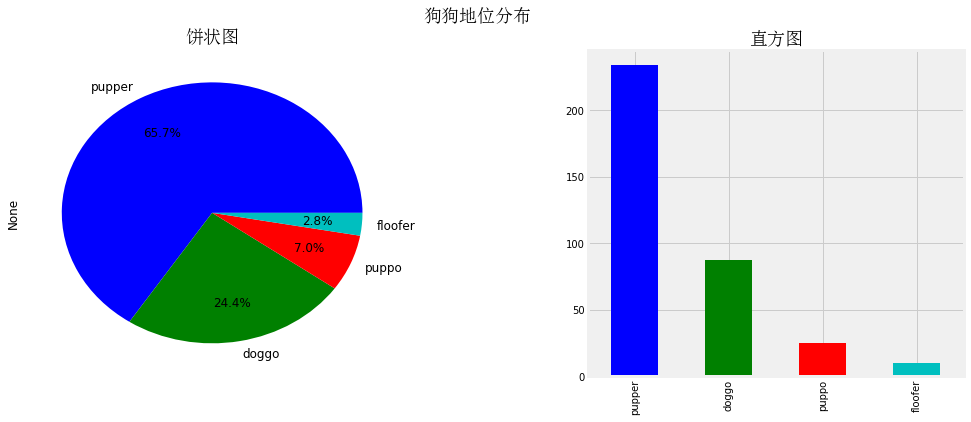

In [129]:
f, ax = plt.subplots(1, 2, figsize = (15,6))
plt.subplots_adjust(wspace=0.5)
social_status_count.plot(kind='pie',ax = ax[0],colors=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'),
                           labeldistance = 1.1,pctdistance=0.7,autopct='%.1f%%',fontsize=12)
social_status_count.plot(kind= 'bar',ax = ax[1],colors=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'))

ax[0].set_title("饼状图",fontsize=12,color='k',fontproperties=font)
ax[1].set_title("直方图",fontsize=12,color='k',fontproperties=font)

f.suptitle('狗狗地位分布',color='k',fontproperties=font)

** 结论：从图上可以看出参与评分的狗狗中pupper类别的狗狗最多，说明很多人养这种狗狗，这种狗狗很小，而且永远年轻，而且比其他狗狗更成熟，确实这种狗狗更受欢迎。**

**2.人们最常使用什么平台（source）对狗狗进行评分**

In [130]:
source_count = twitter_archive_copy.source.value_counts()
source_count

Twitter for iPhone     2039
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

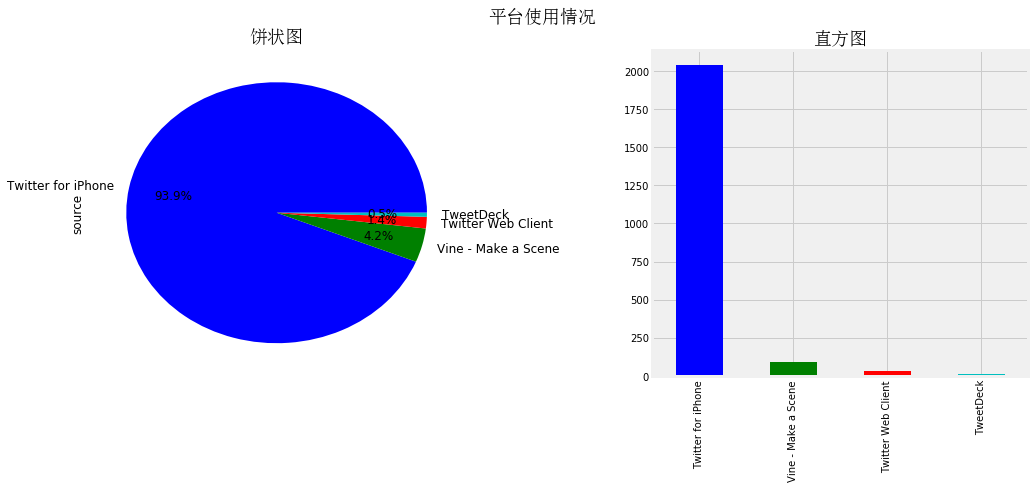

In [131]:
f, ax = plt.subplots(1, 2, figsize = (15,6))
plt.subplots_adjust(wspace=0.5)
source_count.plot(kind='pie',ax = ax[0],colors=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'),
                 labeldistance = 1.1,pctdistance=0.7,autopct='%.1f%%',fontsize=12)
source_count.plot(kind= 'bar',ax = ax[1],colors=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'))

ax[0].set_title("饼状图",fontsize=12,color='k',fontproperties=font)
ax[1].set_title("直方图",fontsize=12,color='k',fontproperties=font)
f.suptitle('平台使用情况',color='k',fontproperties=font)

**结论：最常使用的手机对狗狗进行评分，占比93.9%，大多数人都比较喜欢使用手机围观推特上的信息**

**3.最受欢迎的狗狗名字（取前20名）**

In [132]:
name_count = twitter_archive_copy.name.value_counts()[0:21]
name_count

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Penny       9
Tucker      9
Lola        8
Sadie       8
Winston     8
Daisy       7
Toby        7
Bailey      6
Oscar       6
Bella       6
Stanley     6
Bo          6
Koda        6
Jax         6
Buddy       5
Dave        5
Milo        5
Name: name, dtype: int64

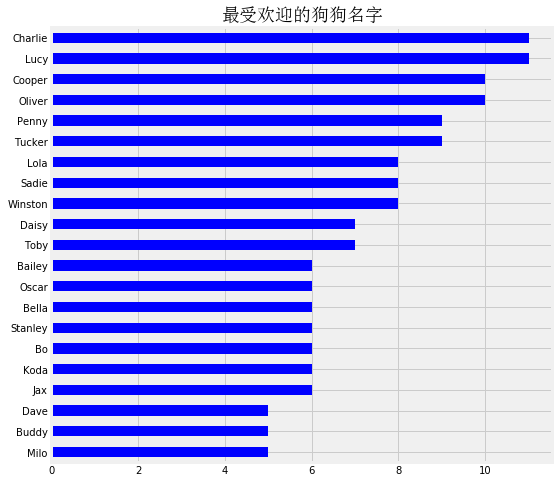

In [133]:
name_count.sort_values().plot(kind='barh',color='b',figsize=(8,8))
plt.title("最受欢迎的狗狗名字",fontsize=12,color='k',fontproperties=font)

**结论：Charlie 和lucy是最受欢迎的两个名字，其次为Oliver和Cooper**